In [2]:
import numpy as np
import matplotlib.pyplot as plt
from aeon.datasets import load_classification

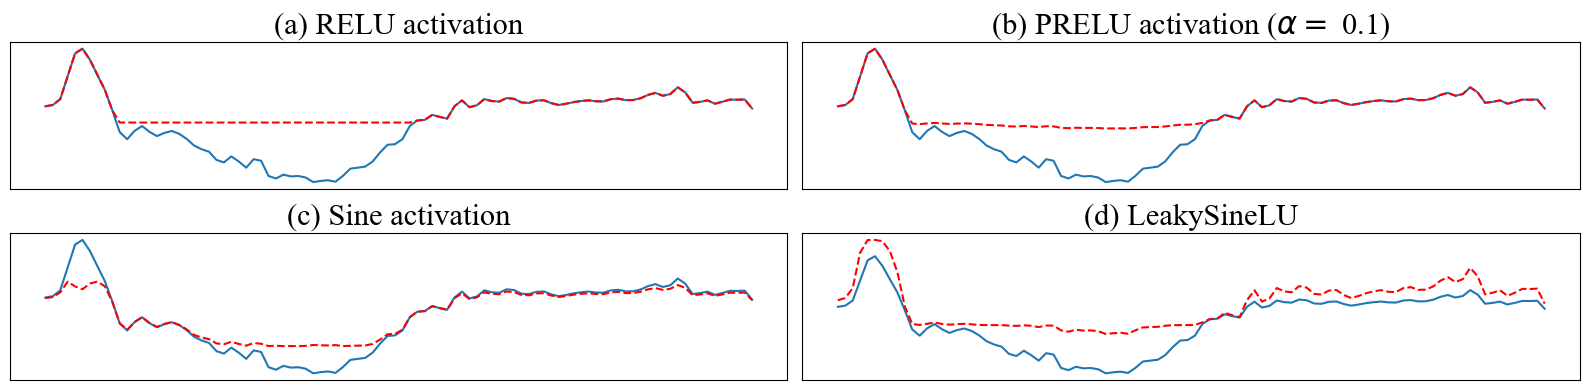

In [8]:
csfont = {'fontname':'Times New Roman', 'fontsize': 22}

X_train, y_train = load_classification(name='ECG200', split='TRAIN')

fig, axs = plt.subplots(2, 2, figsize=(16, 4))

##

axs[0, 0].plot(X_train[0, 0, :])
axs[0, 0].plot(np.where(X_train[0, 0, :] > 0, X_train[0, 0, :], 0), color='red', linestyle='dashed')
axs[0, 0].set_title('(a) RELU activation', **csfont)

axs[0, 0].set_yticklabels([])
axs[0, 0].set_xticklabels([])

axs[0, 0].set_xticks([])
axs[0, 0].set_yticks([])

##

axs[0, 1].plot(X_train[0, 0, :])
axs[0, 1].plot(np.where(X_train[0, 0, :] > 0, X_train[0, 0, :], 0.1 * X_train[0, 0, :]), color='red', linestyle='dashed')
axs[0, 1].set_title(r'(b) PRELU activation ($\alpha =$ 0.1)', **csfont)

axs[0, 1].set_yticklabels([])
axs[0, 1].set_xticklabels([])

axs[0, 1].set_xticks([])
axs[0, 1].set_yticks([])

##

axs[1, 0].plot(X_train[0, 0, :])
axs[1, 0].plot(np.sin(X_train[0, 0, :]), color='red', linestyle='dashed')
axs[1, 0].set_title(r'(c) Sine activation', **csfont)

axs[1, 0].set_yticklabels([])
axs[1, 0].set_xticklabels([])

axs[1, 0].set_xticks([])
axs[1, 0].set_yticks([])

##

axs[1, 1].plot(X_train[0, 0, :])
axs[1, 1].plot(np.where(X_train[0, 0, :] > 0, np.sin(X_train[0, 0, :]) ** 2 + X_train[0, 0, :], 0.5 * (np.sin(X_train[0, 0, :]) ** 2 + X_train[0, 0, :])),
               color='red', linestyle='dashed')
axs[1, 1].set_title(r'(d) LeakySineLU', **csfont)

axs[1, 1].set_yticklabels([])
axs[1, 1].set_xticklabels([])

axs[1, 1].set_xticks([])
axs[1, 1].set_yticks([])

plt.tight_layout()
plt.savefig('./activations_comparison.pdf')

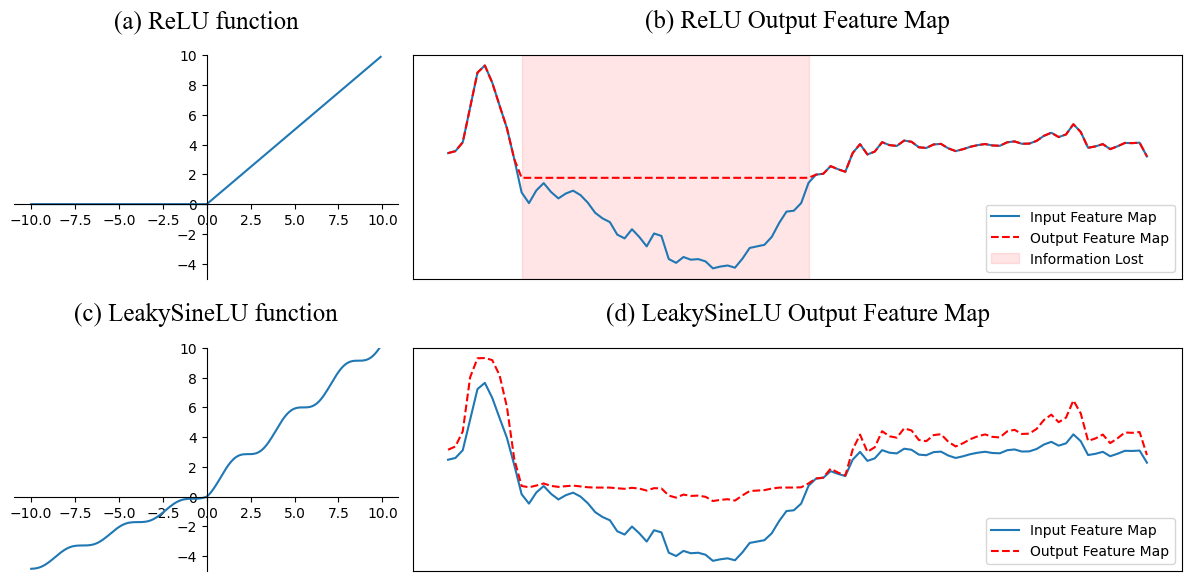

In [84]:
def leaky_sinelu(x):
    return np.where(x > 0, np.sin(x) ** 2 + x, (np.sin(x) ** 2 + x) / 2)

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

csfont = {'fontname':'Times New Roman', 'fontsize': 18}

X_train, y_train = load_classification(name='ECG200', split='TRAIN')


fig = plt.figure(figsize=(12, 6))
gs = fig.add_gridspec(2,2, width_ratios=[1,2])

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])

ax0.plot(np.arange(-10, 10, 0.1), np.where(np.arange(-10, 10, 0.1) > 0, np.arange(-10, 10, 0.1), 0))
ax0.set_ylim([-5, 10])
ax0.spines['bottom'].set_position('zero')
ax0.spines['left'].set_position('zero')
ax0.spines['top'].set_visible(False)
ax0.spines['right'].set_visible(False)
ax0.set_title('(a) ReLU function', **csfont)

ax1.plot(X_train[0, 0, :], label='Input Feature Map')
ax1.plot(np.where(X_train[0, 0, :] > 0, X_train[0, 0, :], 0), color='red', linestyle='dashed', label='Output Feature Map')
ax1.set_yticklabels([])
ax1.set_xticklabels([])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.fill_between(list(range(len(X_train[0, 0, :]))), 0, 1, where=X_train[0, 0, :] < 0, color='red', alpha=0.1, transform=ax1.get_xaxis_transform(), label='Information Lost')
ax1.set_title('(b) ReLU Output Feature Map', **csfont)
ax1.legend(loc='lower right')

ax2.plot(np.arange(-10, 10, 0.1), leaky_sinelu(np.arange(-10, 10, 0.1)), 0)
ax2.set_ylim([-5, 10])
ax2.spines['bottom'].set_position('zero')
ax2.spines['left'].set_position('zero')
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_title('(c) LeakySineLU function', **csfont)

ax3.plot(X_train[0, 0, :], label='Input Feature Map')
ax3.plot(leaky_sinelu(X_train[0, 0, :]), color='red', linestyle='dashed', label='Output Feature Map')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
ax3.set_xticks([])
ax3.set_yticks([])
# ax3.fill_between(list(range(len(X_train[0, 0, :]))), 0, 1, where=X_train[0, 0, :] == 0, color='red', alpha=0.1, transform=ax3.get_xaxis_transform(), label='Information Lost')
ax3.set_title('(d) LeakySineLU Output Feature Map', **csfont)
ax3.legend(loc='lower right')

plt.tight_layout()
plt.savefig('./bounded_activation_time_series.pdf')



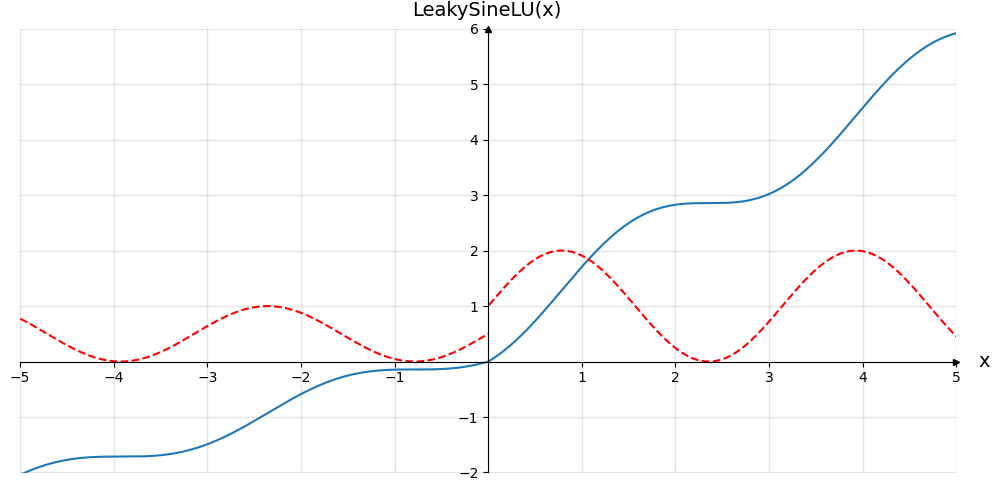

In [4]:
def leaky_sinelu(x):
    return np.where(x > 0, np.sin(x) ** 2 + x, (np.sin(x) ** 2 + x) / 2)

def d_leaky_sinelu(x):
    return np.where(x > 0, np.sin(2*x) + 1, (np.sin(2*x) + 1) / 2)

fig, ax = plt.subplots(figsize=(10, 5))

xmin, xmax, ymin, ymax = -5, 5, -5, 7
ticks_frequency = 1

x = np.arange(-10, 10, 0.01)
y = leaky_sinelu(x)

ax.plot(x, y)
ax.plot(x[x>0], d_leaky_sinelu(x[x>0]), linestyle='dashed', color='red')
ax.plot(x[x<=0], d_leaky_sinelu(x[x<=0]), linestyle='dashed', color='red')

# ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('x', size=14, labelpad=-24, x=1.03)
ax.set_ylabel('LeakySineLU(x)', size=14, labelpad=-21, y=1.02, rotation=0)

x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
ax.set_xticks(x_ticks[x_ticks != 0])
ax.set_yticks(y_ticks[y_ticks != 0])


ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
ax.set_yticks(np.arange(ymin, ymax+1), minor=True)

ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)

arrow_fmt = dict(markersize=4, color='black', clip_on=False)


ax.set_xlim([-5, 5])
ax.set_ylim([-2, 6])

ax.plot((1), (0), marker='>', transform=ax.get_yaxis_transform(), **arrow_fmt)
ax.plot((0), (1), marker='^', transform=ax.get_xaxis_transform(), **arrow_fmt)

plt.tight_layout()
plt.savefig('leaky_sinelu.pdf')